# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.



# Описание данных
**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м) \
**balcony** — число балконов \
**ceiling_height** — высота потолков (м) \
**cityCenters_nearest** — расстояние до центра города (м)\
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)\
**first_day_exposition** — дата публикации\
**floor** — этаж\
**floors_total** — всего этажей в доме\
**is_apartment** — апартаменты (булев тип)\
**kitchen_area** — площадь кухни в квадратных метрах (м²)\
**last_price** — цена на момент снятия с публикации\
**living_area** — жилая площадь в квадратных метрах(м²)\
**locality_name** — название населённого пункта\
**open_plan** — свободная планировка (булев тип)\
**parks_around3000** — число парков в радиусе 3 км\
**parks_nearest** — расстояние до ближайшего парка (м)\
**ponds_around3000** — число водоёмов в радиусе 3 км\
**ponds_nearest** — расстояние до ближайшего водоёма (м)\
**rooms** — число комнат\
**studio** — квартира-студия (булев тип)\
**total_area** — площадь квартиры в квадратных метрах (м²)\
**total_images** — число фотографий квартиры в объявлении


# Оглавление

[Открытие данных](#id-open) \
[Предобработка данных](#id-transformation) \
[Расчет новых столбцов](#id-new-columns) \
[Исследовательский анализ](#id-exploratory) \
[Общий вывод](#id-summary) 


### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id="id-open"></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/datasets/real_estate_data.csv", delimiter="\t")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.shape

(23699, 22)

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15615,14,5200000.0,80.00,2018-10-09T00:00:00,3,2.65,9.0,47.5,2,NaN,False,False,12.60,NaN,посёлок Шушары,18403.0,31095.0,0.0,NaN,0.0,NaN,66.0
13282,14,5670000.0,58.00,2018-08-19T00:00:00,2,2.50,9.0,34.0,9,NaN,False,False,8.00,NaN,Санкт-Петербург,49834.0,15515.0,0.0,NaN,0.0,NaN,104.0
16698,20,7500000.0,81.40,2018-10-10T00:00:00,4,2.50,9.0,62.8,1,NaN,False,False,6.10,NaN,Санкт-Петербург,49687.0,15393.0,0.0,NaN,0.0,NaN,204.0
18124,12,2640000.0,35.52,2018-06-21T00:00:00,1,NaN,15.0,15.2,10,False,False,False,10.01,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,19.0
9606,6,5881384.0,94.10,2015-09-03T00:00:00,3,2.70,24.0,47.6,10,NaN,False,False,16.90,NaN,Санкт-Петербург,21793.0,17121.0,0.0,NaN,1.0,31.0,888.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

Первый взгляд на исходную таблицу показал следующее:
- В наборе данных 22 переменных и 23699 наблюдения;
- Переменные total_images, last_price, total_area, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - количественные (некоторые из них можно отнести к категориальным), studio, open_plan, is_apartment - логические; locality_name - переменная, которая содержит строковые значения, first_day_exposition - дата;
- Типы колонок: 3 - int64, 14 - float64, 3 - object, 2 - bool;
- В некоторых колонках есть пустые значения, которые надо проработать;
- В некоторых колонках, например, total_area, ceiling_height большой разброс между 75% персентилем и max значением. Похожая ситуация наблюдается между min и 25 персентилем в таких колонках, как, например, airports_nearest, cityCenters_nearest. В этих же колонках среднее сильно отличается от медианы. Похоже на выбросы. Надо изучить этот момент, например, построив boxplots.

### Шаг 2. Предобработка данных <a id="id-transformation"></a>

***Определите и изучите пропущенные значения:***

- для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
- заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
- укажите причины, которые могли привести к пропускам в данных.


***Приведите данные к нужным типам:***

- поясните, в каких столбцах нужно изменить тип данных и почему.

### Обработка пустых значений

In [10]:
df.isna().mean()[df.isna().mean() * 100 != 0] * 100

ceiling_height         38.799105
floors_total            0.362885
living_area             8.029875
is_apartment           88.290645
kitchen_area            9.612220
balcony                48.605426
locality_name           0.206760
airports_nearest       23.384953
cityCenters_nearest    23.287902
parks_around3000       23.283683
parks_nearest          65.909954
ponds_around3000       23.283683
ponds_nearest          61.559559
days_exposition        13.422507
dtype: float64

Будем выделять группы переменных и обрабатывать для них одинаковым образом пустые значения.

In [11]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Выделим 1-ю группу пустых значений - значения, которые могут быть равны 0. Например если в пределах 3-х км нет парков или прудов, система, которая автоматически определяет информацию на основе картографических данных, может оставлять значения пустыми.

In [12]:
df[['is_apartment',
    'parks_around3000', 
    'ponds_around3000', 
    'balcony']] = df[['is_apartment',
    'parks_around3000', 
    'ponds_around3000', 
    'balcony']].fillna(0)

2-я группа пустых значений - пустые значения занимают меньше 1% от всех данных. В этом случае удалим такие строки, мы не потеряем много информации. Причина образования пропусков может быть любой - например, человек не заполнил информацию, ошибка системы при записи информации и пр.

In [13]:
df = df.query("locality_name.notna() and floors_total.notna()")

In [14]:
df.shape

(23565, 22)

3-я группа пустых значений - колонки, где более 10% пустых значений. В данном случае, чтобы не искажать первоначальную информацию, оставим значения пустыми.  К таким колонкам относятся cityCenters_nearest, ceiling_height, airports_nearest, parks_nearest, ponds_nearest, days_exposition. Причина появления пустых значений зависит от источника информации. Для показателей, которые заполняет человек (ceiling_height) причина может быть в том, что человек не владел нужной информацией на момент размещения объявления. В случае заполнения информации системой на основе картографических данных, могла произойти ошибка системы либо система не смогла автоматически определить нужные значения. 

4-я группа пустых значений - пустые значения, которые можно попробовать рассчитать. Посчитаем медианное соотношение межу living_area и общей площадью квартиры и заполним пустые значения умножив медианное соотношение на площадь квартиры для соответствующих строк. Такую же операцию проделаем для kitchen_area. Причина образования пустых значений - человек не заполнил/не знал нужную информацию.

In [15]:
def median_area(area, total_area=df["total_area"]):
    proportion = area/total_area
    median = proportion.fillna(proportion.median())
    area = median * total_area
    return area

In [16]:
df["living_area"] = median_area(df["living_area"])

In [17]:
df["kitchen_area"] = median_area(df["kitchen_area"])

In [18]:
df.isna().mean()[df.isna().mean() * 100 != 0] * 100

ceiling_height         38.548695
airports_nearest       23.441545
cityCenters_nearest    23.343942
parks_nearest          65.924040
ponds_nearest          61.654997
days_exposition        13.456397
dtype: float64

### Приведение данных к нужным типам

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           8030 non-null float64
ponds_around30

In [20]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [21]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,0,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,0,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,0,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,90.345393,9,0,False,False,27.405646,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,0,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Приведем колонку с датой к типу дата. Переменные bool переведем в категориальные 0/1 для удобства восприятия. В колонках, в которых отсутствуют пустые значения и которые по логике не могут быть дробными, приведем float к int для экономии памяти.

In [22]:
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
df["is_apartment"] = df["open_plan"] * 1

In [24]:
df["open_plan"] = df["open_plan"] * 1

In [25]:
df["studio"] = df["studio"] * 1

In [26]:
df = df.astype({"floors_total":"int", "is_apartment":"category", "studio":"category", \
                "open_plan":"category", "balcony":"int"})

## Вывод

Пустые значения были обнаружены и обработаны различными способами. Для ряда переменных было принято решение не обрабатывать пустые значения.

Типы данных были изменены там, где необходимо.

### Шаг 3. Посчитайте и добавьте в таблицу<a id="id-new-columns"></a>

Посчитайте и добавьте в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [27]:
df["sq_m_price"] = df["last_price"] / df["total_area"]

In [28]:
df["year"] = df["first_day_exposition"].dt.year.astype("int")

In [29]:
df["month"] = df["first_day_exposition"].dt.month.astype("int")

In [30]:
df["weekday"] = df["first_day_exposition"].dt.weekday.astype("int")

In [31]:
def floor_categ(row):
    floor = row["floor"]
    floors = row["floors_total"]
    if floor == 1:
        return "первый"
    if floor == floors:
        return "последний"
    return "другой"

In [32]:
df["floor_cat"] = df.apply(floor_categ, axis=1).astype("category")

In [33]:
df["living_prop"] = df["living_area"] / df["total_area"]

In [34]:
df["kitchen_prop"] = df["kitchen_area"] / df["total_area"]

In [35]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,year,month,weekday,floor_cat,living_prop,kitchen_prop
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,0,0,0,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,0,0,0,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,0,0,0,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,90.345393,9,0,0,0,27.405646,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4,другой,0.568210,0.172363
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,0,0,0,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null category
studio                  23565 non-null category
open_plan               23565 non-null category
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           8030 non-null float64


### Вывод

Требуемые столбцы добавлены.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a id="id-exploratory"></a>

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Text(0, 0.5, 'Количество значений')

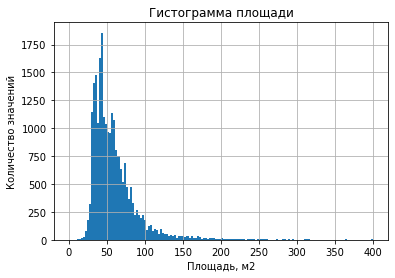

In [37]:
ax = df["total_area"].hist(bins=150, range=(0,400))
ax.set_title("Гистограмма площади")
ax.set_xlabel("Площадь, м2")
ax.set_ylabel("Количество значений")

In [38]:
df["total_area"].max()

900.0

In [39]:
df["total_area"].min()

12.0

Пик количества квартир приходится на площадь 40-50 кв.м. Распределение имеет длинный правый хвост. Квартиры больше 100 кв. м. встречаются редко.

Text(0, 0.5, 'Количество значений')

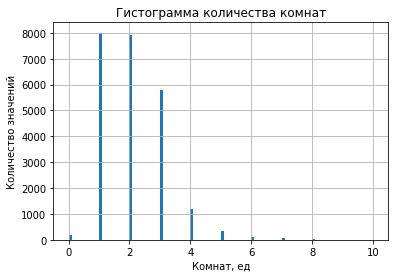

In [40]:
ax = df["rooms"].hist(bins=100, range=(0, 10))
ax.set_title("Гистограмма количества комнат")
ax.set_xlabel("Комнат, ед")
ax.set_ylabel("Количество значений")

Одинаково часто в выборке встречаются 1-2-х комнатные квартиры. Есть странные значения комнат = 0. Посмотрим, что за они.

In [41]:
df.query("rooms == 0")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,year,month,weekday,floor_cat,living_prop,kitchen_prop
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50000,2,0,1,0,4.653789,2,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0,90740.740741,2017,3,3,другой,0.574074,0.172363
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00000,1,1,0,1,4.309064,0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0,92800.000000,2017,9,2,первый,0.680000,0.172363
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75000,4,0,1,0,4.672749,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479.158982,2018,3,0,другой,0.912947,0.172363
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30000,19,1,0,1,5.929272,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110.465116,2017,3,1,другой,0.706395,0.172363
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,14.20525,7,0,1,0,4.309064,0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0,74000.000000,2019,2,2,другой,0.568210,0.172363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00000,16,0,1,0,4.481426,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,123076.923077,2017,9,4,другой,0.692308,0.172363
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00000,4,1,0,1,4.774443,2,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,4.0,90252.707581,2017,9,3,другой,0.649819,0.172363
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19,14.77346,8,0,1,0,4.481426,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,128846.153846,2018,9,4,другой,0.568210,0.172363
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00000,8,1,0,1,4.998514,2,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,82.0,50000.000000,2017,11,5,другой,0.620690,0.172363


Количество комнат = 0, а плoщадь > 0. Похоже на ошибку. Заменим 0 на 1. Как минимум 1 комната в квартире должна быть.

In [42]:
df["rooms"].replace(0,1,inplace=True)

Text(0, 0.5, 'Количество значений')

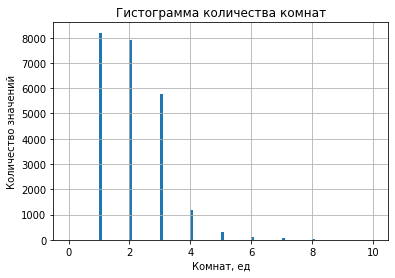

In [43]:
ax = df["rooms"].hist(bins=100, range=(0, 10))
ax.set_title("Гистограмма количества комнат")
ax.set_xlabel("Комнат, ед")
ax.set_ylabel("Количество значений")

Теперь ситуация выглядит более правдоподобной.

Text(0, 0.5, 'Количество значений')

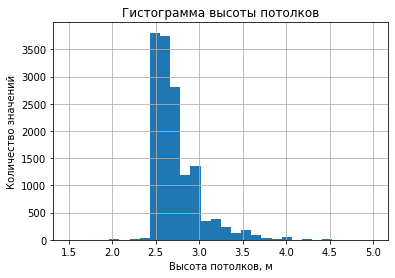

In [44]:
ax = df["ceiling_height"].hist(bins=30, range=(1.5, 5))
ax.set_title("Гистограмма высоты потолков")
ax.set_xlabel("Высота потолков, м")
ax.set_ylabel("Количество значений")

In [45]:
df["ceiling_height"].min()

1.0

In [46]:
df["ceiling_height"].max()

100.0

Сложно представить в реальном мире потолки ниже 2 метров и выше 5 метров. Посмотрим, сколько у нас таких значений и уберем их.

In [47]:
df.query("ceiling_height < 2 or ceiling_height > 5")["ceiling_height"].count()

39

In [48]:
df = df.query("ceiling_height >= 2 or ceiling_height <= 5")

Text(0, 0.5, 'Количество значений')

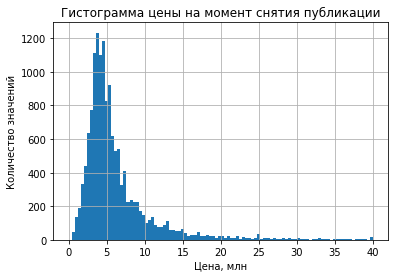

In [49]:
ax = (df["last_price"]/1000000).hist(bins=100, range=(0,40))
ax.set_title("Гистограмма цены на момент снятия публикации")
ax.set_xlabel("Цена, млн")
ax.set_ylabel("Количество значений")

In [50]:
df["last_price"].min()

12190.0

In [51]:
df["last_price"].max()

420000000.0

В гистограмме очень большой правый хвост, а минимальное значение находится слишком близко к 0. Похоже, что в данных есть аномальные значения.

Text(0, 0.5, 'Количество значений')

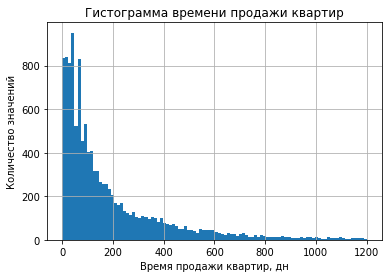

In [52]:
ax = df["days_exposition"].hist(bins=100, range=(0,1200))
ax.set_title("Гистограмма времени продажи квартир")
ax.set_xlabel("Время продажи квартир, дн")
ax.set_ylabel("Количество значений")

In [53]:
df["days_exposition"].min()

1.0

In [54]:
df["days_exposition"].max()

1580.0

Распределение времени продажи квартир похоже на распределение Пуассона. Минимальное значение выглядит валидным, а максимальное интуитивно кажется слишком большим. Изучим это дальше.

In [55]:
df["days_exposition"].median()

103.0

In [56]:
df["days_exposition"].mean()

190.24503366303716

In [57]:
import matplotlib.pyplot as plt
import random

In [58]:
def random_color():
    rgbl=['b', 'g', 'r', 'c', 'm', 'y', 'k']
    random.shuffle(rgbl)
    return tuple(rgbl)

In [59]:
cols =  ["rooms", "ceiling_height", "last_price", "total_area"]

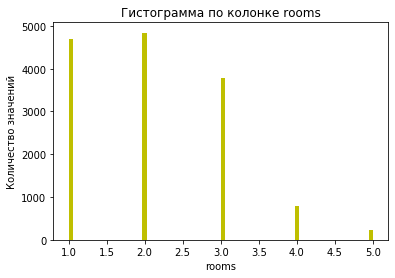

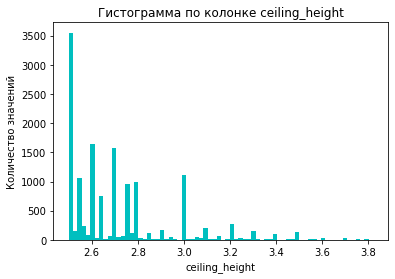

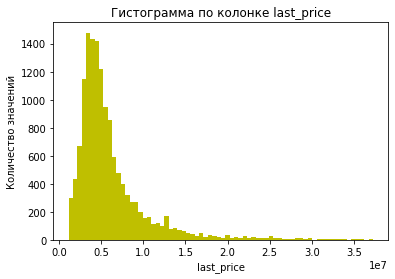

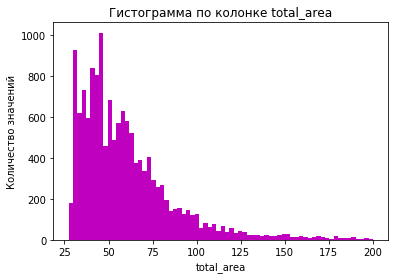

In [60]:
for i in cols:
    ax = df[i].plot(kind = "hist", color=random_color(), bins = 70, range=(df[i].quantile(0.01),df[i].quantile(0.99)))
    ax.set_title("Гистограмма по колонке {}".format(i))
    ax.set_xlabel(i)
    ax.set_ylabel("Количество значений")
    plt.show()

Среднее сильно отличается от медианы, значит есть выбросы. Построим боксплот и проверим.

Text(0, 0.5, 'Количество значений')

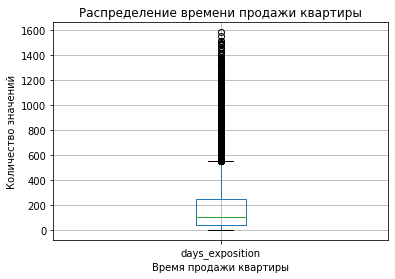

In [61]:
ax = df.boxplot("days_exposition")
ax.set_title("Распределение времени продажи квартиры")
ax.set_xlabel("Время продажи квартиры")
ax.set_ylabel("Количество значений")

По диаграмме boxplot видно, что в колонке "время продажи" имеются выбросы. Определим выбросы с обоих сторон с помощью межквартильного размаха. 

In [62]:
Q1_expos = df["days_exposition"].quantile(0.25)

In [63]:
Q3_expos  = df["days_exposition"].quantile(0.75)

In [64]:
Q1_expos - 1.5 * (Q3_expos - Q1_expos)

-258.0

Нижняя граница меньше минимума, значит с нижней границы нет выбросов. Поэтому посчитаем слишком быстрым временем продажи минимальное значение колонки. 

In [65]:
df["days_exposition"].min()

1.0

In [66]:
Q3_expos + 1.5 * (Q3_expos-Q1_expos)

550.0

Верхняя граница меньше максимума, значит продажа более 550 дней считаются аномально высокими. Уберем аномальные значения с помощью межквартильного размаха.

In [67]:
df = df.query("days_exposition < @Q3_expos + 1.5 * (@Q3_expos-@Q1_expos)")

Text(0, 0.5, 'Количество значений')

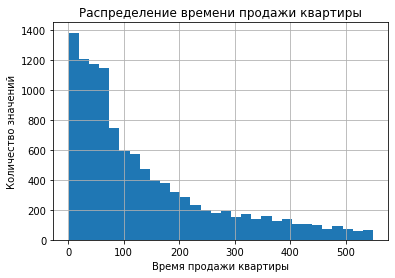

In [68]:
ax = df["days_exposition"].hist(bins=30)
ax.set_title("Распределение времени продажи квартиры")
ax.set_xlabel("Время продажи квартиры")
ax.set_ylabel("Количество значений")

In [69]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sq_m_price', 'year', 'month',
       'weekday', 'floor_cat', 'living_prop', 'kitchen_prop'],
      dtype='object')

In [70]:
df_corr = df.corr()[["last_price"]].sort_values("last_price", ascending=False).reset_index()

In [71]:
df_corr

,index,last_price
0,last_price,1.000000
1,total_area,0.710846
2,sq_m_price,0.709287
3,living_area,0.619252
4,kitchen_area,0.549537
5,rooms,0.391103
6,ponds_around3000,0.199300
7,parks_around3000,0.197878
8,total_images,0.100127
9,days_exposition,0.083453


In [72]:
import seaborn as sns

[Text(0.5, 1, 'Heatmap по всей выборке')]

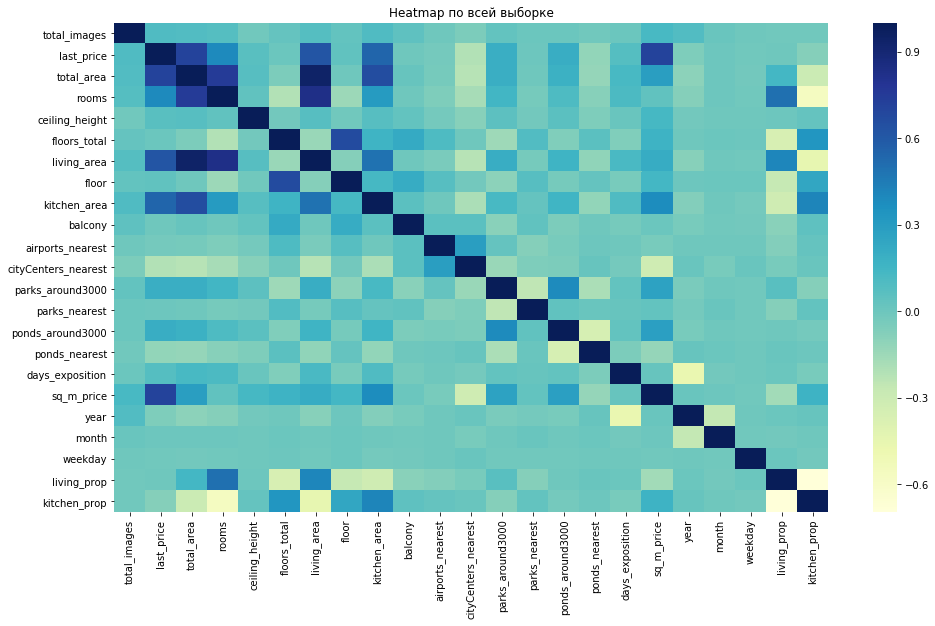

In [73]:
fig, ax = plt.subplots(figsize=(16,9))    
ax = sns.heatmap(df.corr(), cmap="YlGnBu", ax=ax)
ax.set(title="Heatmap по всей выборке")

Исходя из матрицы корреляции наблюдается сильная положительная зависимость между ценой продажи квартиры и ценой за квадратный метр. Это неудивительно, потому что цена за квадратный метр в данной таблице - расчетная величина от цены продажи квартиры. Также присутствует средняя положительная зависимость между ценой продажи квартиры и площадью, количеством комнат. Все остальные значения характеризуют слабую корреляцию. Изучим взаимосвязи дальше с помощью диаграмм.

Text(0, 0.5, 'Цена продажи квартиры')

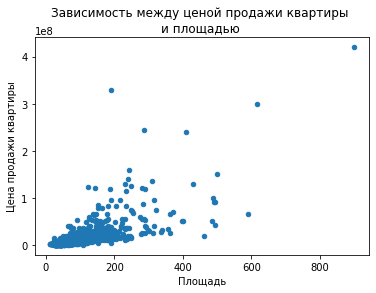

In [74]:
ax = df.plot(x='total_area', y='last_price', kind="scatter") 
ax.set_title("Зависимость между ценой продажи квартиры \nи площадью ")
ax.set_xlabel("Площадь")
ax.set_ylabel("Цена продажи квартиры")

Исходя из диаграммы прослеживается зависимость между стоимостью квартиры и площадью - чем больше площадь квартиры, тем больше ее стоимость. Зачастую стоимость квартиры и определяется от стоимости квадратного метра, умноженного на площадь квартиры. Так что такая взаимосвязь не противоречит реальному миру.

In [75]:
import seaborn as sns

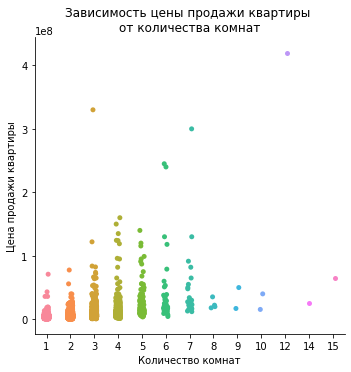

In [76]:
ax = sns.catplot(x="rooms", y="last_price", data=df)
ax.set(xlabel='Количество комнат', ylabel='Цена продажи квартиры', 
       title="Зависимость цены продажи квартиры \nот количества комнат")

Дороже всего продаются квартиры, в которых 4-5 комнат. Интересно, что квартиры, в которых больше комнат в большинстве случаев стоят дешевле. Скорее всего такие квартиры встречаются нечасто в объявлениях и данных по ним не так много, поэтому отследить тенденцию сложно. В целом, судя по матрице корреляции, зависимость между ценой квартиры и количеством комнат не такая сильная.

In [77]:
rooms_mean = df.pivot_table(index = "rooms", values = "last_price", aggfunc='mean').reset_index()

Text(0, 0.5, 'Средняя цена продажи квартиры')

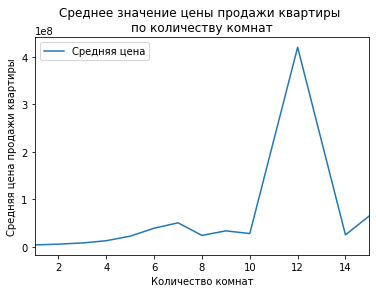

In [78]:
ax = rooms_mean.plot(x='rooms', y='last_price', kind="line", label="Средняя цена") 
ax.set_title("Среднее значение цены продажи квартиры \nпо количеству комнат")
ax.set_xlabel("Количество комнат")
ax.set_ylabel("Средняя цена продажи квартиры")

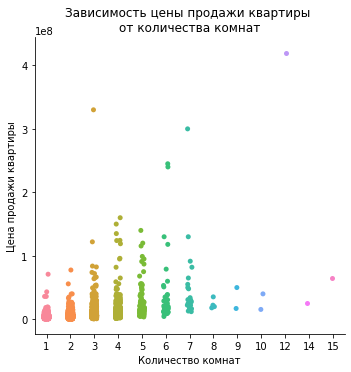

In [79]:
ax = sns.catplot(x="rooms", y="last_price", data=df)
ax.set(xlabel='Количество комнат', ylabel='Цена продажи квартиры', \
       title="Зависимость цены продажи квартиры \nот количества комнат")

Text(0, 0.5, 'Цена продажи квартиры')

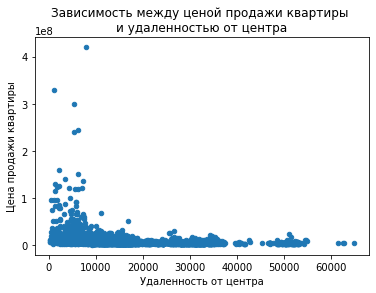

In [80]:
ax = df.plot(x='cityCenters_nearest', y='last_price', kind="scatter") 
ax.set_title("Зависимость между ценой продажи квартиры \nи удаленностью от центра")
ax.set_xlabel("Удаленность от центра")
ax.set_ylabel("Цена продажи квартиры")

Наблюдается отрицательная корреляция между ценой квартиры и удаленностью от центра. Корреляция не такая сильная, но даже на диаграмме заметна тенденция - чем ближе квартира к центру, тем дороже она стоит.

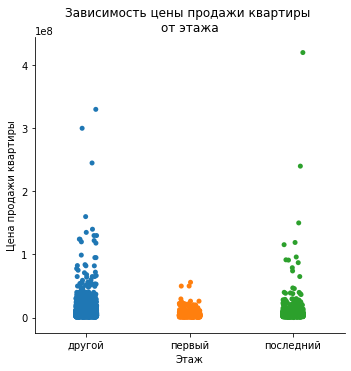

In [81]:
ax = sns.catplot(x="floor_cat", y="last_price", data=df)
ax.set(xlabel='Этаж', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот этажа")

Лучше продавать квартиру не на первом этаже:) Про квартиры на последнем этаже можно сказать следующее - их цена в целом выше, чем на первом этаже, но ниже, чем на любом другом. Также можно отметить несколько выбросов - цена на верхнем этаже очень высокая. Возможно, это квартиры с хорошим видом.

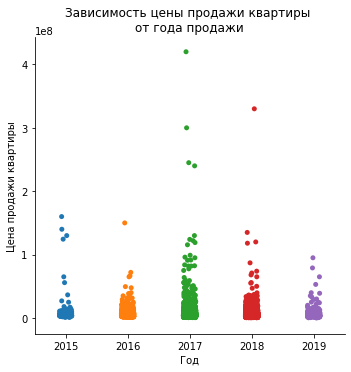

In [82]:
ax = sns.catplot(x="year", y="last_price", data=df)
ax.set(xlabel='Год', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот года продажи")

2017 год был пиком продаж квартир за высокую цену. В следующие года наблюдается ухудшение ситуации. Матрица корреляции выдает небольшую отрицательную корреляюцию, но значение настолько маленькое, что его можно не брать в расчет.

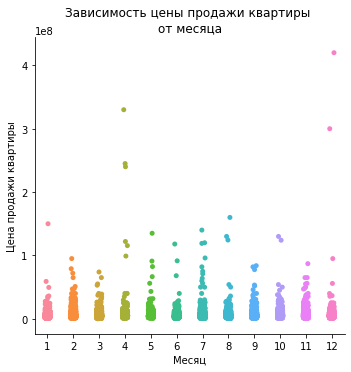

In [83]:
ax = sns.catplot(x="month", y="last_price", data=df)
ax.set(xlabel='Месяц', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот месяца")

Очевидная зависимость от месяца продажи не наблюдается ни на матрице корреляции, ни на диаграмме.

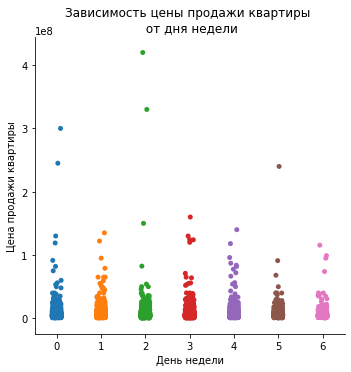

In [84]:
ax = sns.catplot(x="weekday", y="last_price", data=df)
ax.set(xlabel='День недели', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \n от дня недели")

Очевидная зависимость от дня недели не наблюдается ни на матрице корреляции, ни на диаграмме.

In [85]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sq_m_price', 'year', 'month',
       'weekday', 'floor_cat', 'living_prop', 'kitchen_prop'],
      dtype='object')

In [86]:
top10 = df.pivot_table(index = "locality_name", values = "total_images", aggfunc='count').\
                        sort_values("total_images", ascending=False)[:11:]

In [87]:
top10.index

Index(['Санкт-Петербург', 'Всеволожск', 'посёлок Мурино', 'посёлок Шушары',
       'Колпино', 'Пушкин', 'посёлок Парголово', 'Гатчина', 'Петергоф',
       'деревня Кудрово', 'Сестрорецк'],
      dtype='object', name='locality_name')

In [88]:
df_top10 = df.query("locality_name in @top10.index")

In [89]:
df_top10.pivot_table(index = "locality_name", values = "sq_m_price", aggfunc='mean').\
                    reset_index().sort_values("sq_m_price", ascending=False).reset_index(drop=True)

,locality_name,sq_m_price
0,Санкт-Петербург,112475.834623
1,Сестрорецк,101681.152966
2,Пушкин,101525.834887
3,деревня Кудрово,91025.803411
4,посёлок Парголово,89548.309361
5,посёлок Мурино,87822.358444
6,Петергоф,83069.071224
7,посёлок Шушары,78504.714422
8,Колпино,74867.699780
9,Гатчина,69894.158606


Самая высокая стоимость квадратного метра среди выбранных городов с наибольшим числом объявлений в Санкт-Петербурге, а самая низкая во Всеволожске.

In [90]:
sp_df = df.query("locality_name == 'Санкт-Петербург'")

In [91]:
sp_df["cityCenters_nearest_km"] = sp_df["cityCenters_nearest"].apply(lambda x: x/1000)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
sp_df["cityCenters_nearest_km"].fillna(0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [93]:
sp_df["cityCenters_nearest_km"] = sp_df["cityCenters_nearest_km"].astype("int")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Цена продажи квартиры')

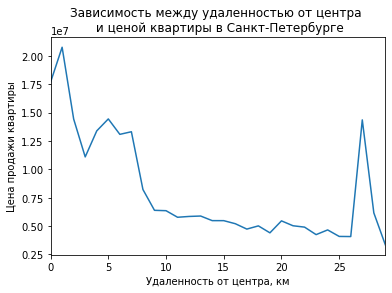

In [94]:
ax = sp_df.groupby('cityCenters_nearest_km')['last_price'].mean().plot()
ax.set_title("Зависимость между удаленностью от центра \n и ценой квартиры в Санкт-Петербурге")
ax.set_xlabel("Удаленность от центра, км")
ax.set_ylabel("Цена продажи квартиры")

Чем дальше квартира находится от центра, тем дешевле она стоит - наблюдается четкий нисходящий тренд. Центральную зону выделю в промежутке до 7 км от центра. После 7 км график резко уходит вниз. На расстоянии после 25 км наблюдается неожиданный пик. Не всем людям нравится жить в центре города и некоторые предпочитают жить в зонах с менее плотной постройкой и ездить на работу в центр. Спрос на такие квартиры может быть высоким, а спрос формирует предложение с соответствующими ценами.

In [95]:
sp_df_center = sp_df.query("cityCenters_nearest_km <= 7")

In [96]:
sp_df_center.shape

(1673, 30)

In [97]:
sp_df_corr = sp_df.corr()[["last_price"]].sort_values("last_price", ascending=False).reset_index()

In [98]:
sp_df_center_corr = sp_df_center.corr()[["last_price"]].sort_values("last_price", ascending=False).reset_index()

In [99]:
corr_total = sp_df_corr.join(sp_df_center_corr,  lsuffix="_sp", rsuffix = "_center")

In [100]:
corr_total.columns

Index(['index_sp', 'last_price_sp', 'index_center', 'last_price_center'], dtype='object')

In [101]:
corr_total = corr_total[['index_sp', 'last_price_sp', 'last_price_center']]

In [102]:
corr_total["diff"] = corr_total['last_price_sp'] - corr_total['last_price_center']

In [103]:
corr_total.sort_values("diff", ascending=False).dropna()

,index_sp,last_price_sp,last_price_center,diff
7,parks_around3000,0.164288,0.133991,0.030297
3,living_area,0.628903,0.608252,0.020651
5,rooms,0.404514,0.395592,0.008923
18,floors_total,-0.036532,-0.044767,0.008235
2,total_area,0.719834,0.716354,0.003480
0,last_price,1.000000,1.000000,0.000000
16,living_prop,-0.008999,-0.008739,-0.000260
6,ponds_around3000,0.169431,0.170071,-0.000639
17,airports_nearest,-0.012801,-0.009434,-0.003367
4,kitchen_area,0.561614,0.565960,-0.004346


Кардинального различия в матрице корреляции не наблюдается среди квартир в центре и квартир, которые находятся в Санкт-Петербурге. Самое большое отличие в переменной расстояние от центра города. В выборке по всему городу расстояние оказывает большее влияние на цену продажи квартиры, чем среди квартир, которые находятся в центре, что логично.

Text(0, 0.5, 'Цена продажи квартиры')

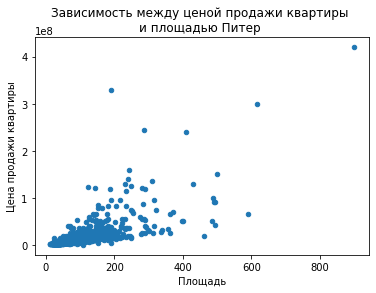

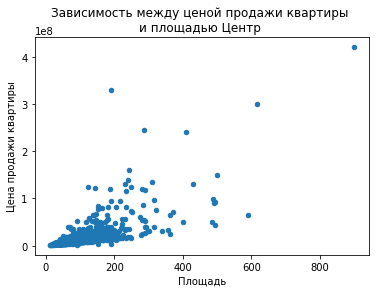

In [104]:
ax = sp_df.plot(x='total_area', y='last_price', kind="scatter") 
ax1 = sp_df_center.plot(x='total_area', y='last_price', kind="scatter") 
ax.set_title("Зависимость между ценой продажи квартиры \nи площадью Питер ")
ax.set_xlabel("Площадь")
ax.set_ylabel("Цена продажи квартиры")
ax1.set_title("Зависимость между ценой продажи квартиры \nи площадью Центр ")
ax1.set_xlabel("Площадь")
ax1.set_ylabel("Цена продажи квартиры")

Диаграммы очень схожи.

Text(0, 0.5, 'Цена продажи квартиры')

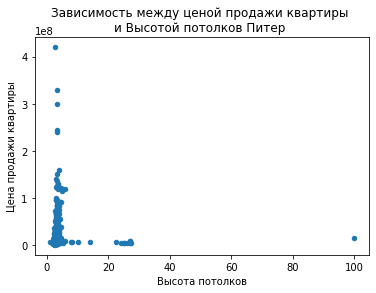

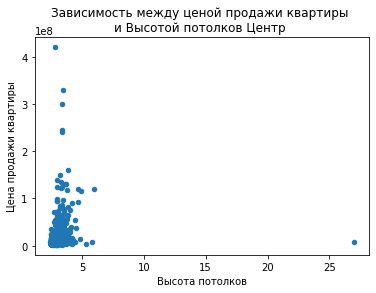

In [105]:
ax = sp_df.plot(x='ceiling_height', y='last_price', kind="scatter") 
ax.set_title("Зависимость между ценой продажи квартиры \nи Высотой потолков Питер ")
ax.set_xlabel("Высота потолков")
ax.set_ylabel("Цена продажи квартиры")
ax1 = sp_df_center.plot(x='ceiling_height', y='last_price', kind="scatter") 
ax1.set_title("Зависимость между ценой продажи квартиры \nи Высотой потолков Центр ")
ax1.set_xlabel("Высота потолков")
ax1.set_ylabel("Цена продажи квартиры")

Во всем городе в распределении можно отметить правый хвост - квартиры с высокими потолками могут продваться по цене квартир с низкими потолками. В центре такая ситуация не наблюдается.

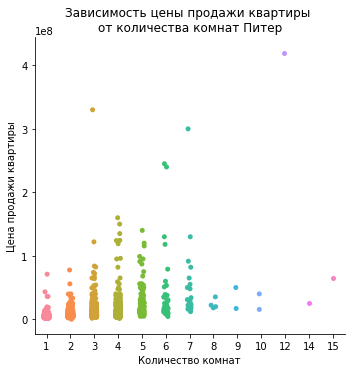

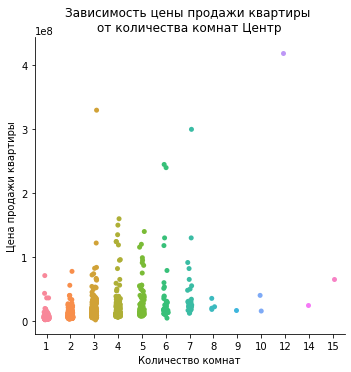

In [106]:
ax = sns.catplot(x="rooms", y="last_price", data=sp_df)
ax.set(xlabel='Количество комнат', ylabel='Цена продажи квартиры', 
       title="Зависимость цены продажи квартиры \nот количества комнат Питер")
ax1 = sns.catplot(x="rooms", y="last_price", data=sp_df_center)
ax1.set(xlabel='Количество комнат', ylabel='Цена продажи квартиры', 
        title="Зависимость цены продажи квартиры \nот количества комнат Центр")

Диаграммы очень схожи.

Text(0, 0.5, 'Цена продажи квартиры')

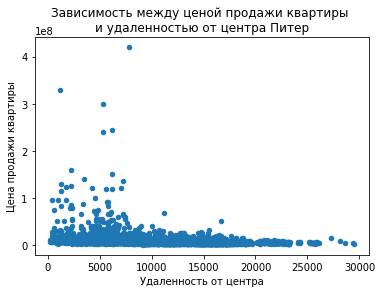

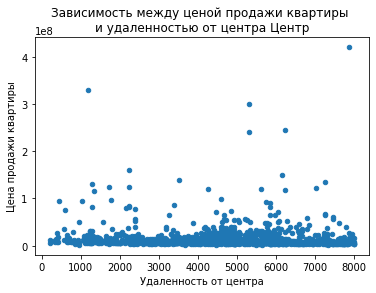

In [107]:
ax = sp_df.plot(x='cityCenters_nearest', y='last_price', kind="scatter") 
ax.set_title("Зависимость между ценой продажи квартиры \nи удаленностью от центра Питер")
ax.set_xlabel("Удаленность от центра")
ax.set_ylabel("Цена продажи квартиры")
ax1 = sp_df_center.plot(x='cityCenters_nearest', y='last_price', kind="scatter") 
ax1.set_title("Зависимость между ценой продажи квартиры \nи удаленностью от центра Центр")
ax1.set_xlabel("Удаленность от центра")
ax1.set_ylabel("Цена продажи квартиры")

Во всем городе есть тенденция к дорогим квартирам в центре города. В центре больше шума по всей диаграмме. Квартиры с разной удаленностью от центра могут стоить дорого.

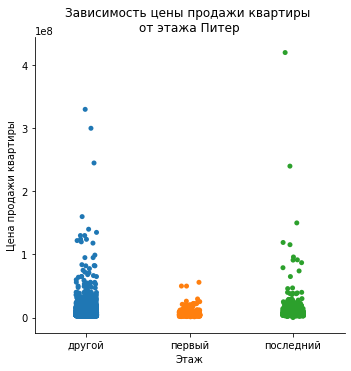

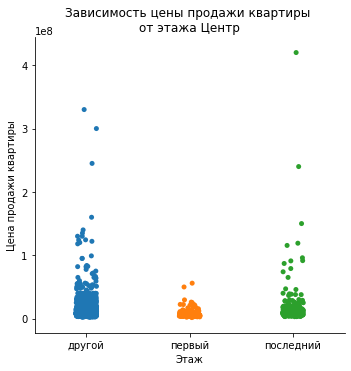

In [108]:
ax = sns.catplot(x="floor_cat", y="last_price", data=sp_df)
ax.set(xlabel='Этаж', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот этажа Питер")
ax1 = sns.catplot(x="floor_cat", y="last_price", data=sp_df_center)
ax1.set(xlabel='Этаж', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот этажа Центр")

Диаграммы очень схожи.

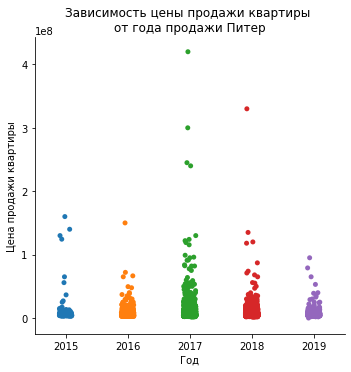

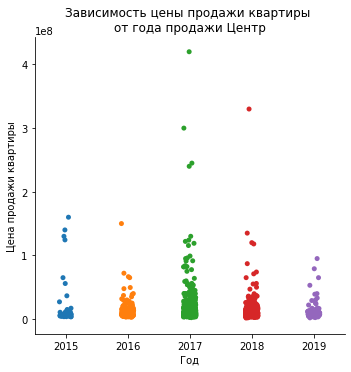

In [109]:
ax = sns.catplot(x="year", y="last_price", data=sp_df)
ax.set(xlabel='Год', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот года продажи Питер")
ax1 = sns.catplot(x="year", y="last_price", data=sp_df_center)
ax1.set(xlabel='Год', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот года продажи Центр")

Диаграммы очень схожи.

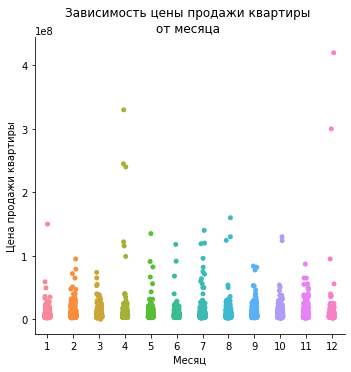

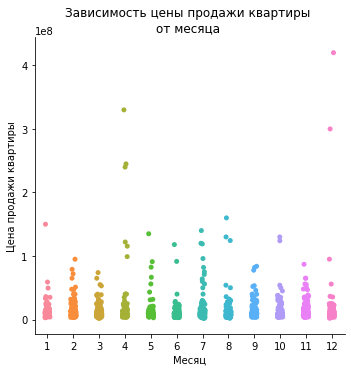

In [110]:
for i in [sp_df, sp_df_center]:
    ax = sns.catplot(x="month", y="last_price", data=i)
    ax.set(xlabel='Месяц', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот месяца ")
plt.show()

In [111]:
sp_df_month_mean = sp_df.pivot_table(index = "month", values = "last_price", aggfunc='mean').reset_index()

In [112]:
sp_df_center_mean = sp_df_center.pivot_table(index = "month", values = "last_price", aggfunc='mean').reset_index()

In [113]:
sp_df_center_month_mean = sp_df_center_mean.join(sp_df_month_mean,  lsuffix="_сenter", rsuffix = "_sp") \
[["month_сenter", "last_price_сenter",  "last_price_sp"]]

Text(0, 0.5, 'Средняя цена продажи квартир')

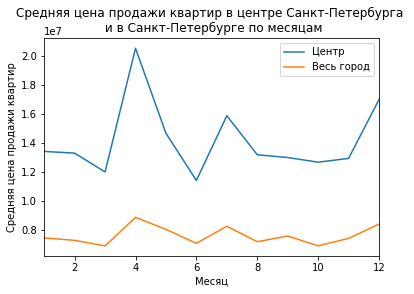

In [114]:
ax = sp_df_center_month_mean.plot(y=["last_price_сenter","last_price_sp"] , x="month_сenter", label=["Центр", "Весь город"]) 
ax.set_title("Средняя цена продажи квартир в центре Санкт-Петербурга \n и в Санкт-Петербурге по месяцам")
ax.set_xlabel("Месяц")
ax.set_ylabel("Средняя цена продажи квартир")

Диаграммы очень схожи.

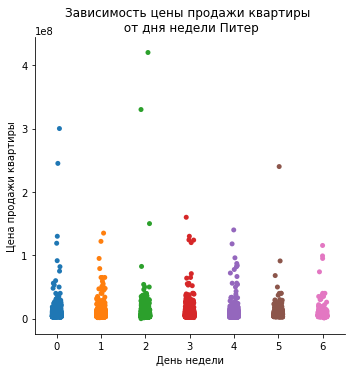

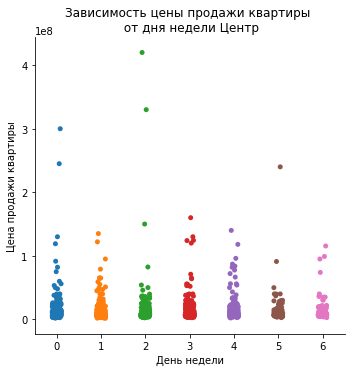

In [115]:
ax = sns.catplot(x="weekday", y="last_price", data=sp_df)
ax.set(xlabel='День недели', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \n от дня недели Питер")
ax1 = sns.catplot(x="weekday", y="last_price", data=sp_df_center)
ax1.set(xlabel='День недели', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \n от дня недели Центр")

В целом ситуация в центре и во всем Санкт-Петербурге очень схожа. Кардинальных отличий я не выявила.

### Шаг 5. Общий вывод <a id="id-summary"></a>

В данном проекте я провела исследование датасета объявлений о продаже квартир. Изучила данные, провела их очистку и заполнила пропуски, провела исследовательский анализ и ответила на поставленные вопросы.

**Основные выводы**:

- Больше всего на цену продажи квартиры влияет  цена за квадратный метр, площадь и количество комнат. Все остальные значения показывают слабое влияние.

- Квартиры на первом этаже в целом стоят дешевле. На последнем дороже, чем на первом, но дешевле, чем на любом другом.

- Самая высокая стоимость квадратного метра среди городов с наибольшим числом объявлений в Санкт-Петербурге, а самая низкая во Всеволожске.

- Наблюдается отрицательная корреляция между ценой квартиры и удаленностью от центра. Чем дальше квартира находится от центра, тем дешевле она стоит - наблюдается четкий нисходящий тренд. 

- Кардинальных различий по различным показателям среди данных во всем Санкт-Петербурге и центре Санкт-Петербурга выявлено не было. 


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x]  Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод